### MNIST data set 불러오기

11490434/11490434 [==============================] - 1s 0us/step
training set:  60000
test set:  10000
(60000, 28, 28)


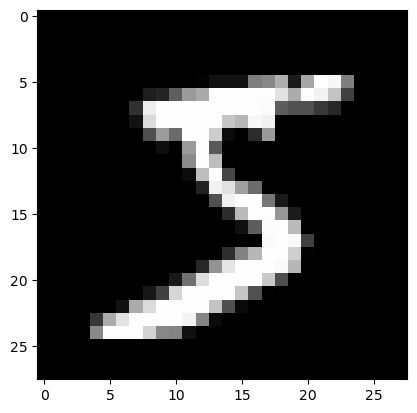

In [1]:
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('training set: ', X_train.shape[0])
print('test set: ', X_test.shape[0])
print(X_train.shape)
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

### 이미지를 픽셀 값으로 바꾸기

In [11]:
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt
import numpy as np
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()
#plt.imshow(X_train[0])
#plt.show()

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')


0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

### 손글씨 인식을 위한 데이터 전처리 코드

training set:  60000
test set:  10000
(60000, 28, 28)


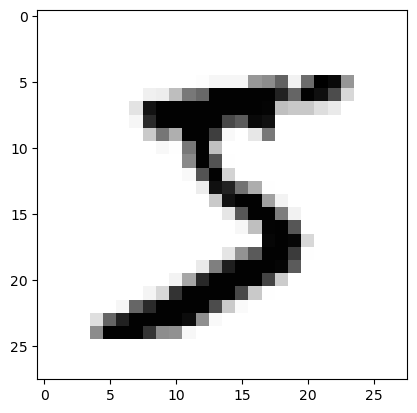

class:  5
class:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data() #mnist 데이타 불러오고 트레인 셋과 테스트 셋으로 분리

print('training set: ', X_train.shape[0])
print('test set: ', X_test.shape[0])
print(X_train.shape)

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

#train set and test set을 1차원으로 바꿔준다.
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Normalization btw [0, 1] 사이로 정규화 해준다.
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

print('class: ', y_train[0])

#레이블을 원핫 인코딩 해준다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('class: ', y_train[0])

### 딥러닝 모델 만들기

#### 1.모델 작성

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#512개의 뉴런으로 만들기.
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
#로스펑션은 카테고리칼 크로스엔트로피 사용
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 2. Elarly stopping 적용

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 

modelpath = './data/model/mnist_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

#10 번이상 성능이 향상되지 않으면 중단.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18937, saving model to ./data/model\mnist_best_model.hdf5

Epoch 2: val_loss improved from 0.18937 to 0.13868, saving model to ./data/model\mnist_best_model.hdf5

Epoch 3: val_loss improved from 0.13868 to 0.11126, saving model to ./data/model\mnist_best_model.hdf5

Epoch 4: val_loss improved from 0.11126 to 0.09814, saving model to ./data/model\mnist_best_model.hdf5

Epoch 5: val_loss improved from 0.09814 to 0.09282, saving model to ./data/model\mnist_best_model.hdf5

Epoch 6: val_loss improved from 0.09282 to 0.08611, saving model to ./data/model\mnist_best_model.hdf5

Epoch 7: val_loss improved from 0.08611 to 0.08545, saving model to ./data/model\mnist_best_model.hdf5

Epoch 8: val_loss did not improve from 0.08545

Epoch 9: val_loss improved from 0.08545 to 0.08310, saving model to ./data/model\mnist_best_model.hdf5

Epoch 10: val_loss did not improve from 0.08310

Epoch 11: val_loss improved from 0.08310 to 0.08089, saving model to ./dat

#### 3. 실행결과를 그래프로 표현

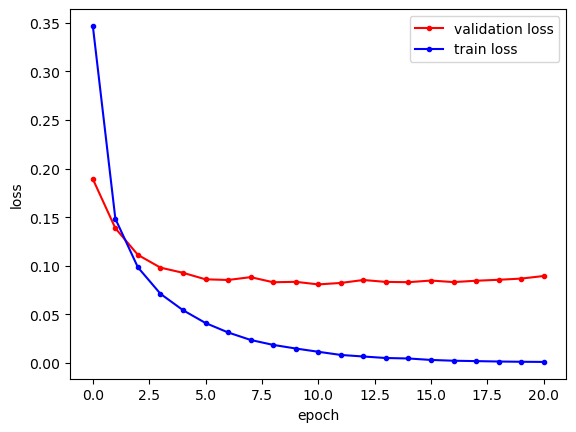

In [15]:
# validation loss
y_vloss = history.history['val_loss']

# train loss
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 4. 손글씨 분류 전체코드

class:  5
class:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Epoch 1: val_loss improved from inf to 0.18266, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5

Epoch 2: val_loss improved from 0.18266 to 0.13891, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5

Epoch 3: val_loss improved from 0.13891 to 0.10996, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5

Epoch 4: val_loss improved from 0.10996 to 0.10011, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5

Epoch 5: val_loss improved from 0.10011 to 0.08740, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5

Epoch 6: val_loss did not improve from 0.08740

Epoch 7: val_loss did not improve from 0.08740

Epoch 8: val_loss improved from 0.08740 to 0.08409, saving model to ./drive/MyDrive/Colab Notebooks/data/model/wine\chapter16_best_model.hdf5


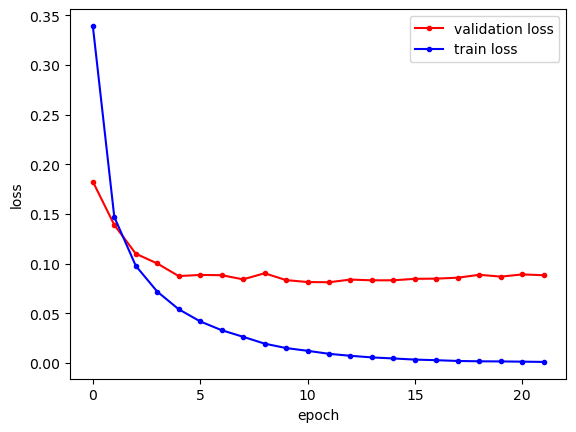

In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalization btw [0, 1]
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

print('class: ', y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('class: ', y_train[0])

# Simple deep learning model
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = './drive/MyDrive/Colab Notebooks/data/model/wine/chapter16_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

총평: 아주 단순한 모델이며 실제로 사용하기에는 부적합한 방법이다.

### 컨벌루션 레이어

#입력 층  
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))  

#히든레이어  
model.add(Conv2D(64, (3, 3), activation = 'relu'))

In [ ]:
#입력 층
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
#         Conv2D(커널의 개수, 커널 사이즈, 입력 크기, 활성화 함수)

#히든레이어
model.add(Conv2D(64, (3, 3), activation = 'relu'))

Max Plooing Layer, Dropout(), Flatten()

In [ ]:
# 케라스의 맥스 풀링 함수
model.add(MaxPooling2D(pool_size = (2, 2)))

# 학습도중 은닉층의 노드를 25%만큼 랜덤리 제거
model.add(Dropout(0.25))

# 1차원 벡타로 변경해준다
model.add(Flatten())


### 손글씨 인식 전체 코드 (CNN)


Epoch 1: val_loss improved from inf to 0.08096, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 2: val_loss improved from 0.08096 to 0.05926, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 3: val_loss improved from 0.05926 to 0.05325, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 4: val_loss improved from 0.05325 to 0.04636, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 5: val_loss improved from 0.04636 to 0.04542, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 6: val_loss improved from 0.04542 to 0.04329, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 7: val_loss improved from 0.04329 to 0.04208, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 8: val_loss improved from 0.04208 to 0.04106, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 9: val_loss improved from 0.04106 to 0.03981, saving model to ./data/model\mnist_cnn_best_model.hdf5

Epoch 10: val_loss did not impr

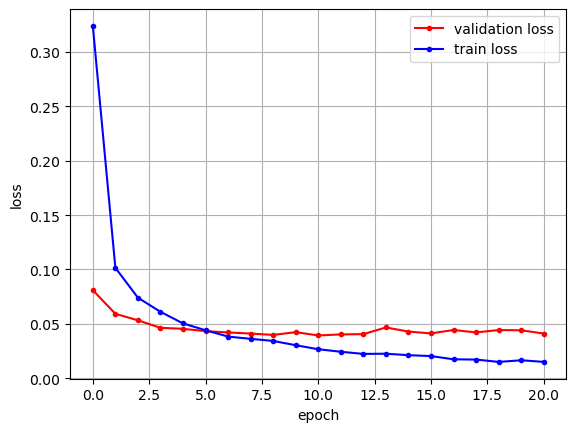

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalization btw [0, 1]
X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.astype('float32')
X_test = X_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Simple deep learning model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = './data/model/mnist_cnn_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()